# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [7]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [8]:
%pip install --upgrade plotly

### Import Statements

In [9]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [10]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [11]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [12]:
df_data.shape

(4324, 9)

In [13]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [14]:
df_data.isna().any()

,0
Unnamed: 0.1,False
Unnamed: 0,False
Organisation,False
Location,False
Date,False
Detail,False
Rocket_Status,False
Price,True
Mission_Status,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [15]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [16]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [17]:
print(type(df_data['Price']))

<class 'pandas.core.series.Series'>


In [18]:
# df_data['Price'] = df_data['Price'].fillna(0)

In [19]:
df_data.isna().any()

,0
Unnamed: 0.1,False
Unnamed: 0,False
Organisation,False
Location,False
Date,False
Detail,False
Rocket_Status,False
Price,True
Mission_Status,False


In [20]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [21]:
df_data.duplicated().values.any()

np.False_

In [22]:
df_data.drop(columns=['Unnamed: 0'], inplace=True)

In [23]:
df_data.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [24]:
df_data.drop(columns=['Unnamed: 0.1'], inplace=True)

In [25]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [26]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Tue Aug 28, 1990 09:05 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [27]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [28]:
mission_launches = df_data["Organisation"].value_counts()
print(mission_launches)

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Rocket Lab            13
ISA                   13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
UT                     5
CASIC                  5
KCST                   5
Exos                   4
CECLES                 4
Arm??e de l'

/tmp/ipython-input-3072221005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = mission_launches.index, x = mission_launches.values, palette="viridis")


Text(0.5, 1.0, 'Number of Space Mission Launches by Organisation')

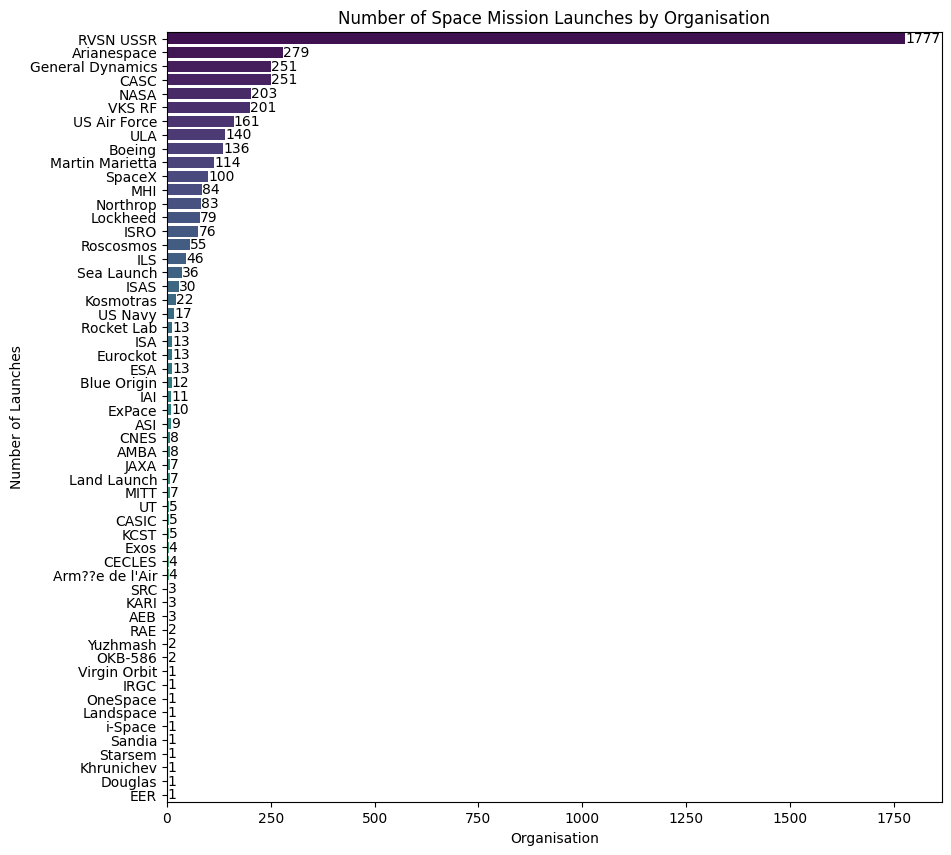

In [29]:
plt.figure(figsize=(10, 10))
sns.barplot(y = mission_launches.index, x = mission_launches.values, palette="viridis")

for i, count in enumerate(mission_launches.values):
    plt.text(count + 0.1, i, str(count), ha='left', va='center')

plt.xlabel('Organisation')
plt.ylabel('Number of Launches')
plt.title('Number of Space Mission Launches by Organisation')

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [30]:
counts_rocket = df_data["Rocket_Status"].value_counts()
print(counts_rocket)

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64


In [31]:
total = counts_rocket.sum()

active_rockets = counts_rocket["StatusActive"]
retired_rockets = counts_rocket["StatusRetired"]

active_percentage = (counts_rocket["StatusActive"]/total)*100
retired_percentage = (counts_rocket["StatusRetired"]/total)*100

print("Active Rockets", active_rockets, "({:.2f}%)".format(active_percentage))
print("Retired Rockets", retired_rockets, "({:.2f}%)".format(retired_percentage))

Active Rockets 790 (18.27%)
Retired Rockets 3534 (81.73%)


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [32]:
mission_succesfull = (df_data["Mission_Status"] == "Success").sum()
mission_failed = (df_data["Mission_Status"] == "Failure").sum()

print("Mission Successfull", mission_succesfull)
print("Mission Failed", mission_failed)

Mission Successfull 3879
Mission Failed 339


In [33]:
total_missions = len(df_data["Mission_Status"])

succes_percentage = (mission_succesfull/total_missions)*100
failure_percentage = (mission_failed/total_missions)*100

print("Mission succesfull {:.2f}%".format(succes_percentage))
print("Mission failed {:.2f}%".format(failure_percentage))

Mission succesfull 89.71%
Mission failed 7.84%


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [34]:
print(type(df_data['Price']))

<class 'pandas.core.series.Series'>


In [35]:
df_data['Price'].head()

,Price
0,50.0
1,29.75
2,NaN
3,65.0
4,145.0


In [36]:
df_data.dropna(subset=['Price'], inplace=True)

In [37]:
df_data.drop_duplicates(inplace=True)

In [38]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

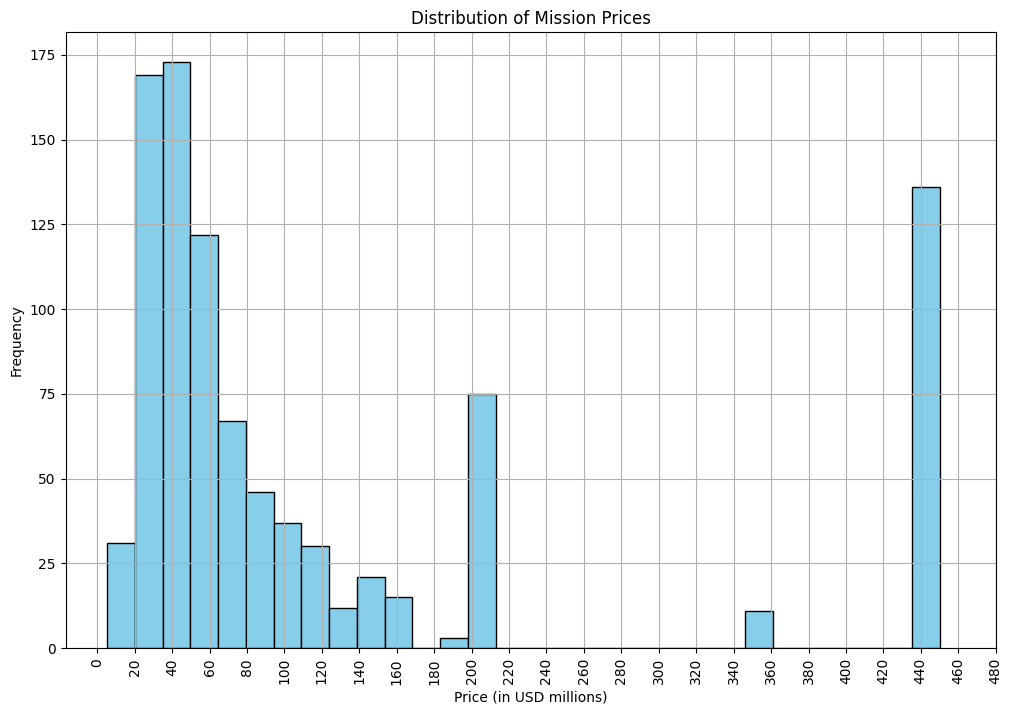

In [39]:
plt.figure(figsize=(12, 8))
plt.hist(df_data['Price'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Mission Prices')
plt.xlabel('Price (in USD millions)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 500, step=20), rotation=90)
plt.grid(True)
plt.show()

In [40]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [41]:
df_data['Location'].head(10)

,Location
0,"LC-39A, Kennedy Space Center, Florida, USA"
1,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce..."
3,"Site 200/39, Baikonur Cosmodrome, Kazakhstan"
4,"SLC-41, Cape Canaveral AFS, Florida, USA"
5,"LC-9, Taiyuan Satellite Launch Center, China"
6,"Site 31/6, Baikonur Cosmodrome, Kazakhstan"
8,"SLC-40, Cape Canaveral AFS, Florida, USA"
9,"LA-Y1, Tanegashima Space Center, Japan"
10,"LP-0B, Wallops Flight Facility, Virginia, USA"
11,"Site 95, Jiuquan Satellite Launch Center, China"


In [42]:
df_data['Location'].isna().values.any()

np.False_

In [43]:
new_names ={
    "Russia": "Russia Federation",
    "Shahrud Missile Test Site": "Iran",
    "New Mexico": "USA",
    "Pacific Missile Range Facility": "USA",
    "Yellow Sea": "China",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "USA"
}

df_data['Location'] = df_data['Location'].replace(new_names)

def country_names(data):
  name = data.split(",")
  return name[-1].strip()

df_data["Country_codes"] = df_data["Location"].apply(country_names)

In [44]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_codes
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China


In [45]:
iso_codes = {}
for i in df_data['Country_codes'].unique():
  try:
    iso_codes[i] = countries.get(i).alpha3
  except:
    pass

df_data["ISO"] = df_data["Country_codes"].map(iso_codes)

launches = df_data["ISO"].value_counts().reset_index()
launches.columns = ["ISO", "Launches"]

figure = px.choropleth(launches,
                       locations="ISO",
                       color="Launches",
                       hover_name="ISO",
                       color_continuous_scale=px.colors.sequential.matter)

figure.show()

In [46]:
print(launches.columns)

Index(['ISO', 'Launches'], dtype='object')


In [47]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_codes,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN


# Use a Choropleth Map to Show the Number of Failures by Country


In [48]:
failures = df_data[df_data["Mission_Status"] == "Failure"]

failure = failures["ISO"].value_counts().reset_index()
failure.columns = ["ISO", "Failures"]

figure = px.choropleth(failure,
                       locations="ISO",
                       color="Failures",
                       hover_name="ISO",
                       color_continuous_scale=px.colors.sequential.matter)

figure.show()

In [49]:
print(failure.columns)

Index(['ISO', 'Failures'], dtype='object')


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [50]:
df_data.head(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_codes,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA


In [ ]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "notebook"
fig = px.sunburst(
    df_data,
    names='Country_codes',
    parents='Organisation',
    values='Mission_Status',
    width=800,
    height=700
)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [52]:
total = df_data.groupby('Organisation')['Price'].sum()
print(total)

Organisation
Arianespace       16,345.00
Boeing             1,241.00
CASC               6,310.51
EER                   20.00
ESA                   37.00
Eurockot             543.40
ExPace                28.30
ILS                1,320.00
ISRO               2,177.00
JAXA                 168.00
Kosmotras            638.00
Lockheed             280.00
MHI                3,532.50
Martin Marietta      721.40
NASA              61,200.00
Northrop           3,930.00
RVSN USSR              0.00
Rocket Lab            97.50
Roscosmos          1,187.50
Sandia                15.00
SpaceX             5,444.00
ULA               14,798.00
US Air Force       1,550.92
VKS RF             1,548.90
Virgin Orbit          12.00
Name: Price, dtype: float64


In [53]:
count = df_data["Organisation"].value_counts()
print(count)

Organisation
CASC               157
NASA               149
SpaceX              99
ULA                 98
Arianespace         96
Northrop            83
ISRO                67
MHI                 37
VKS RF              33
US Air Force        26
Roscosmos           23
Kosmotras           22
Rocket Lab          13
Eurockot            13
ILS                 13
Martin Marietta      9
Lockheed             8
Boeing               7
JAXA                 3
RVSN USSR            2
ExPace               1
Virgin Orbit         1
Sandia               1
ESA                  1
EER                  1
Name: count, dtype: int64


In [54]:
per_laucnh = total/count
print(per_laucnh)

Organisation
Arianespace       170.26
Boeing            177.29
CASC               40.19
EER                20.00
ESA                37.00
Eurockot           41.80
ExPace             28.30
ILS               101.54
ISRO               32.49
JAXA               56.00
Kosmotras          29.00
Lockheed           35.00
MHI                95.47
Martin Marietta    80.16
NASA              410.74
Northrop           47.35
RVSN USSR           0.00
Rocket Lab          7.50
Roscosmos          51.63
Sandia             15.00
SpaceX             54.99
ULA               151.00
US Air Force       59.65
VKS RF             46.94
Virgin Orbit       12.00
dtype: float64


In [55]:
price_dataset = pd.DataFrame({"Amount of Spent" : total,
                              "Launch count": count,
                              "Spending per launch": per_laucnh})
print(price_dataset)

                 Amount of Spent  Launch count  Spending per launch
Organisation                                                       
Arianespace            16,345.00            96               170.26
Boeing                  1,241.00             7               177.29
CASC                    6,310.51           157                40.19
EER                        20.00             1                20.00
ESA                        37.00             1                37.00
Eurockot                  543.40            13                41.80
ExPace                     28.30             1                28.30
ILS                     1,320.00            13               101.54
ISRO                    2,177.00            67                32.49
JAXA                      168.00             3                56.00
Kosmotras                 638.00            22                29.00
Lockheed                  280.00             8                35.00
MHI                     3,532.50            37  

# Chart the Number of Launches per Year

In [56]:
df_data["Date"].head()

,Date
0,"Fri Aug 07, 2020 05:12 UTC"
1,"Thu Aug 06, 2020 04:01 UTC"
3,"Thu Jul 30, 2020 21:25 UTC"
4,"Thu Jul 30, 2020 11:50 UTC"
5,"Sat Jul 25, 2020 03:13 UTC"


In [57]:
df_data.head(20)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_codes,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,Kazakhstan,KAZ
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,USA,USA
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.00,Success,Japan,JPN
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Wed Jul 15, 2020 13:46 UTC",Minotaur IV | NROL-129,StatusActive,46.00,Success,USA,USA
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,China,CHN


In [58]:
df_data["Date"] = pd.to_datetime(df_data["Date"], errors='coerce')
df_data["Date"].head()

,Date
0,2020-08-07 05:12:00+00:00
1,2020-08-06 04:01:00+00:00
3,2020-07-30 21:25:00+00:00
4,2020-07-30 11:50:00+00:00
5,2020-07-25 03:13:00+00:00


In [59]:
df_data['Date'].isnull().values.any()

np.True_

In [60]:
df_data.dropna(subset=['Date'])

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_codes,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN
...,...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29 18:43:00+00:00,Titan IIIB | KH-8,StatusRetired,59.00,Success,USA,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06 15:00:00+00:00,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11 15:19:00+00:00,Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10 16:52:00+00:00,Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,USA


In [61]:
df_data["Year"] = df_data["Date"].dt.year

launches_per_year = df_data["Year"].value_counts().sort_index()
print(launches_per_year)

Year
1,964.00     2
1,965.00     2
1,966.00     3
1,967.00     7
1,968.00    10
1,969.00     8
1,970.00     1
1,971.00     2
1,972.00     2
1,973.00     1
1,981.00     2
1,982.00     4
1,983.00     5
1,984.00     6
1,985.00    10
1,986.00     3
1,987.00     3
1,988.00     5
1,989.00     6
1,990.00    11
1,991.00     7
1,992.00    12
1,993.00    12
1,994.00    16
1,995.00    10
1,996.00    14
1,997.00    18
1,998.00    18
1,999.00    13
2,000.00    16
2,001.00    10
2,002.00    16
2,003.00    20
2,004.00    17
2,005.00    15
2,006.00    27
2,007.00    29
2,008.00    27
2,009.00    31
2,010.00    29
2,011.00    29
2,012.00    24
2,013.00    33
2,014.00    41
2,015.00    37
2,016.00    64
2,017.00    66
2,018.00    88
2,019.00    73
2,020.00    52
Name: count, dtype: int64


In [62]:
print(launches_per_year.shape)

(50,)


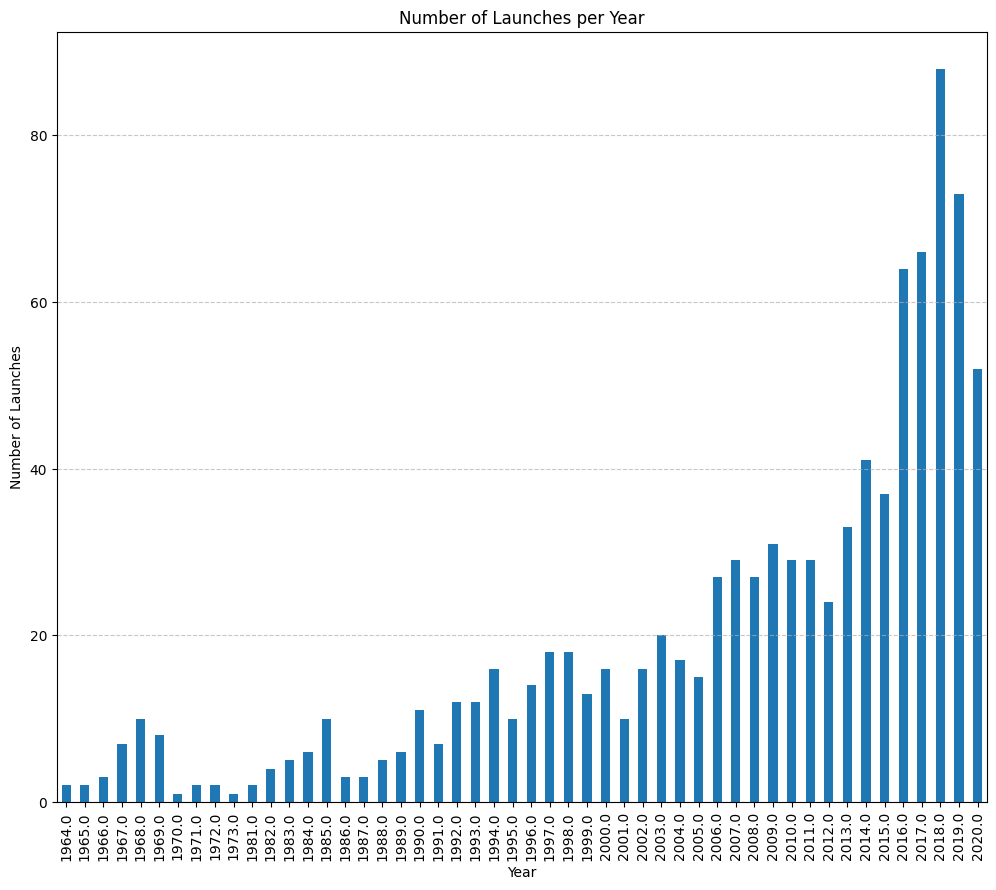

In [63]:
plt.figure(figsize = (12, 10))
launches_per_year.plot(kind = "bar")
plt.title("Number of Launches per Year")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [64]:
df_data.Date.head()

,Date
0,2020-08-07 05:12:00+00:00
1,2020-08-06 04:01:00+00:00
3,2020-07-30 21:25:00+00:00
4,2020-07-30 11:50:00+00:00
5,2020-07-25 03:13:00+00:00


In [65]:
df_data["Month"] = df_data["Date"].dt.strftime("%B")
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_codes,ISO,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,"2,020.00",August
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,"2,020.00",August
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,"2,020.00",July
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,"2,020.00",July
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN,"2,020.00",July


In [66]:
per_month = df_data.groupby(df_data["Month"]).size()
max = per_month.idxmax()
max_number = per_month.max()
print("The highes number of launches was in", max, "with", max_number, "launches")

The highes number of launches was in December with 91 launches


In [67]:
per_month = df_data.groupby(df_data["Month"]).size()
print(per_month)

Month
April        88
August       82
December     91
February     60
January      66
July         77
June         85
March        77
May          86
November     75
October      83
September    87
dtype: int64


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

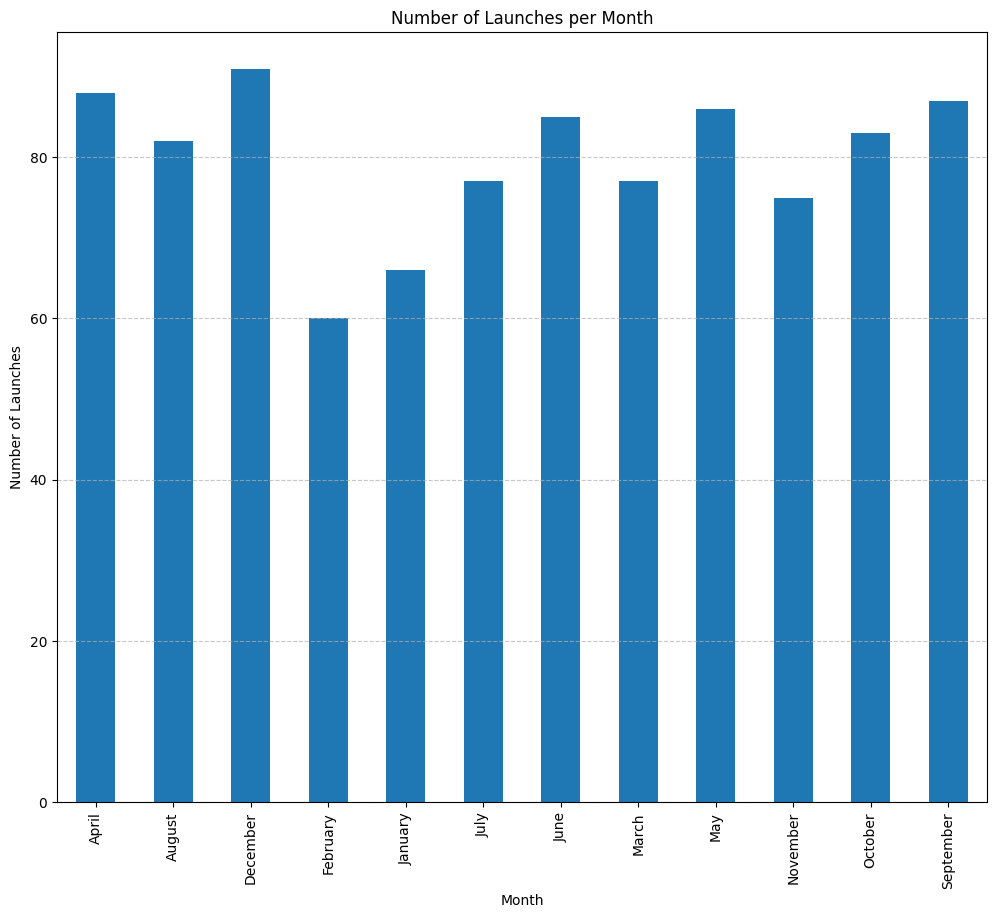

In [68]:
plt.figure(figsize = (12, 10))
per_month.plot(kind = "bar")
plt.title("Number of Launches per Month")
plt.xlabel("Month")
plt.ylabel("Number of Launches")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [69]:
maximum = per_month.idxmax()
minimum = per_month.idxmin()
min_number = per_month.min()
print("The highest number of launches was in", maximum, "with", max_number, "launches")
print("The lowest number of launches was in", minimum, "with", min_number, "launches")

The highest number of launches was in December with 91 launches
The lowest number of launches was in February with 60 launches


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

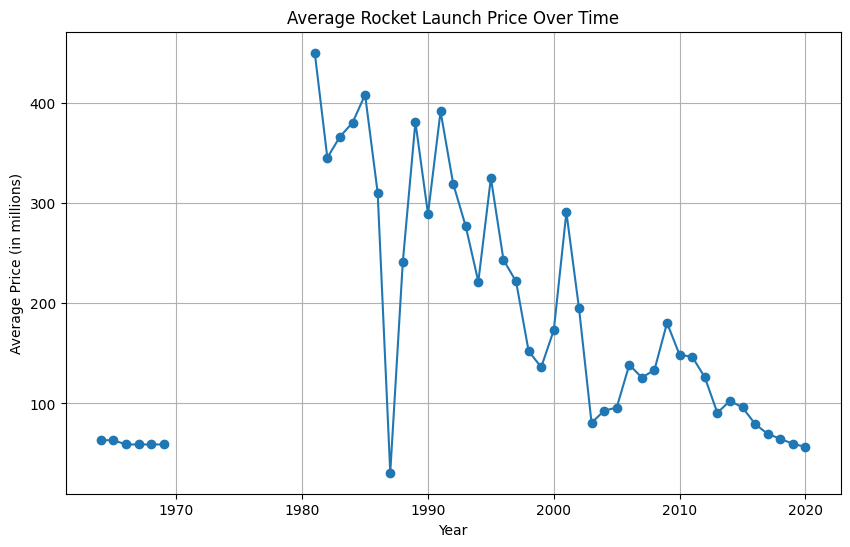

In [70]:
average_price = df_data.groupby(df_data["Year"])["Price"].mean().reset_index()
# print(average_price)

plt.figure(figsize=(10, 6))
plt.plot(average_price['Year'], average_price['Price'], marker='o')
plt.title('Average Rocket Launch Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price (in millions)')
plt.grid(True)
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [71]:
top_10 = df_data["Organisation"].value_counts().head(10)
print(top_10)


Organisation
CASC            157
NASA            149
SpaceX           99
ULA              98
Arianespace      96
Northrop         83
ISRO             67
MHI              37
VKS RF           33
US Air Force     26
Name: count, dtype: int64


/tmp/ipython-input-1635976198.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



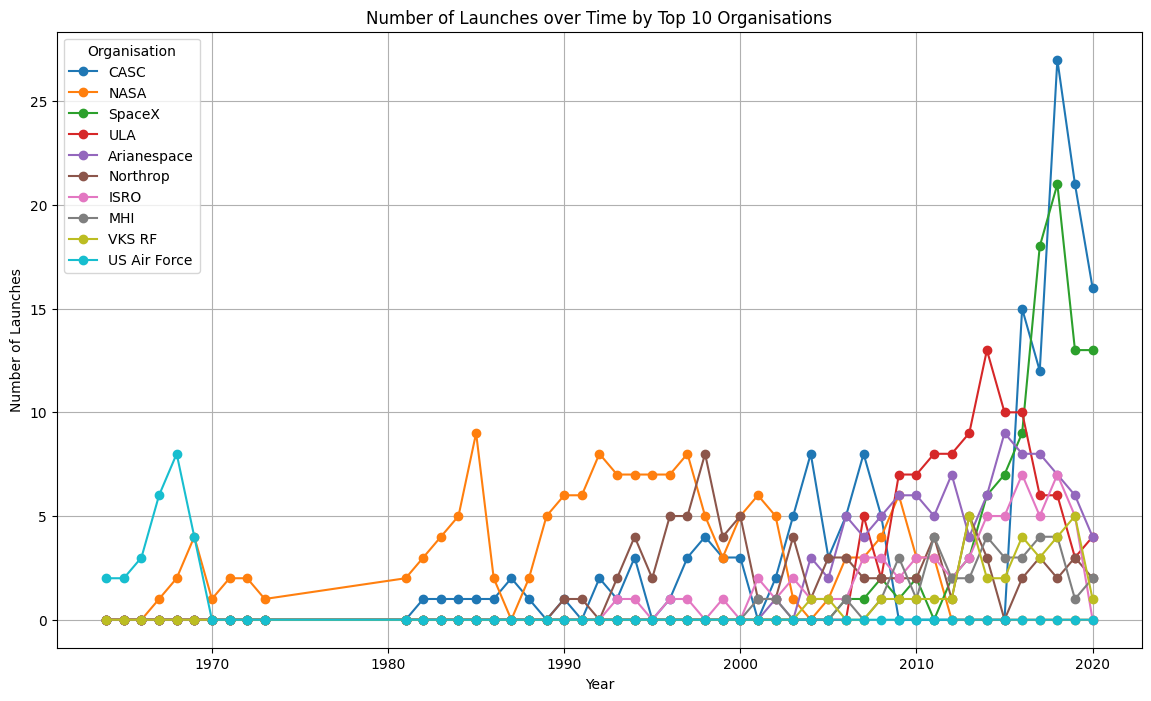

In [72]:
df_top_10 = df_data[df_data["Organisation"].isin(top_10.index)]
df_top_10["Year"] = df_top_10["Date"].dt.year

launches = df_top_10.groupby(["Year", "Organisation"]).size().unstack(fill_value = 0)

plt.figure(figsize=(14, 8))
for org in top_10.index:
    plt.plot(launches.index, launches[org], label=org, marker = "o")
plt.title("Number of Launches over Time by Top 10 Organisations")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.legend(title="Organisation")
plt.grid(True)
plt.show()

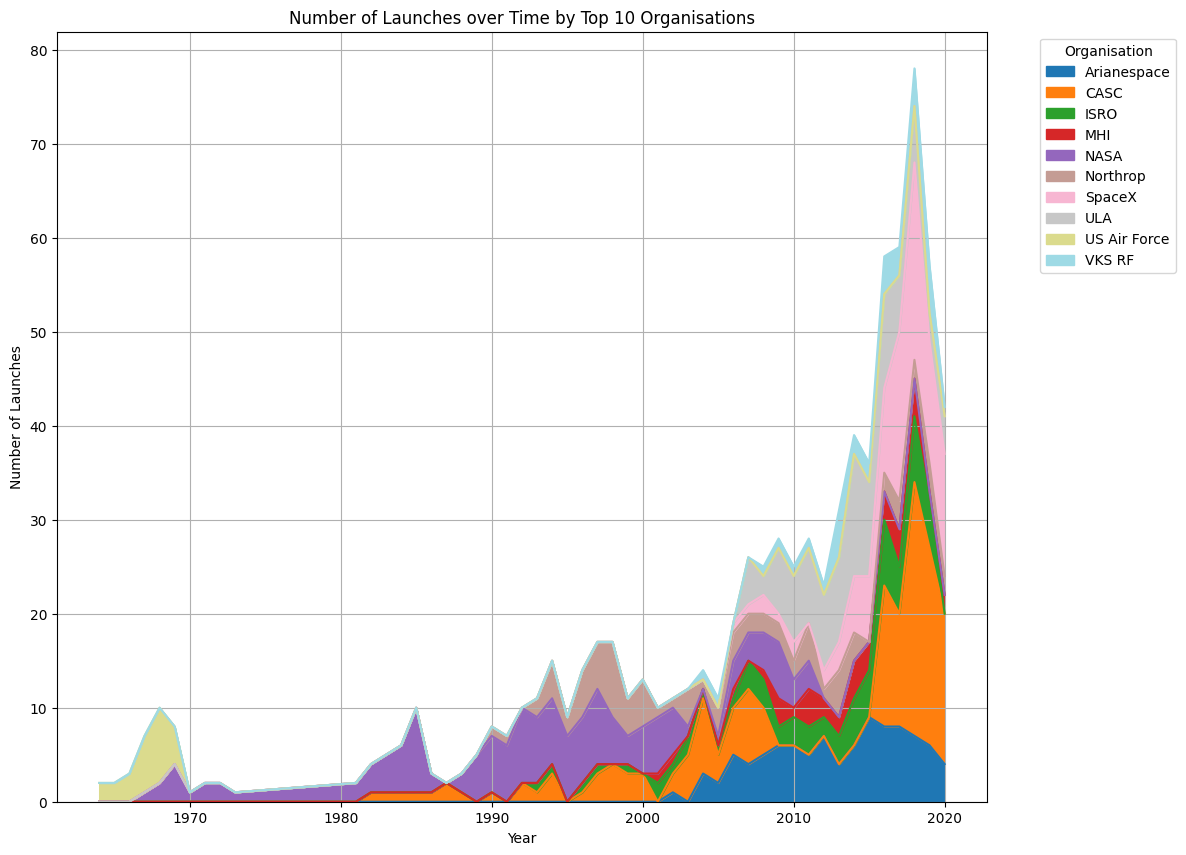

In [73]:
launches.plot(kind = "area", stacked = True, figsize = (12, 10), colormap = "tab20")
plt.title("Number of Launches over Time by Top 10 Organisations")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.legend(title="Organisation", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.grid(True)

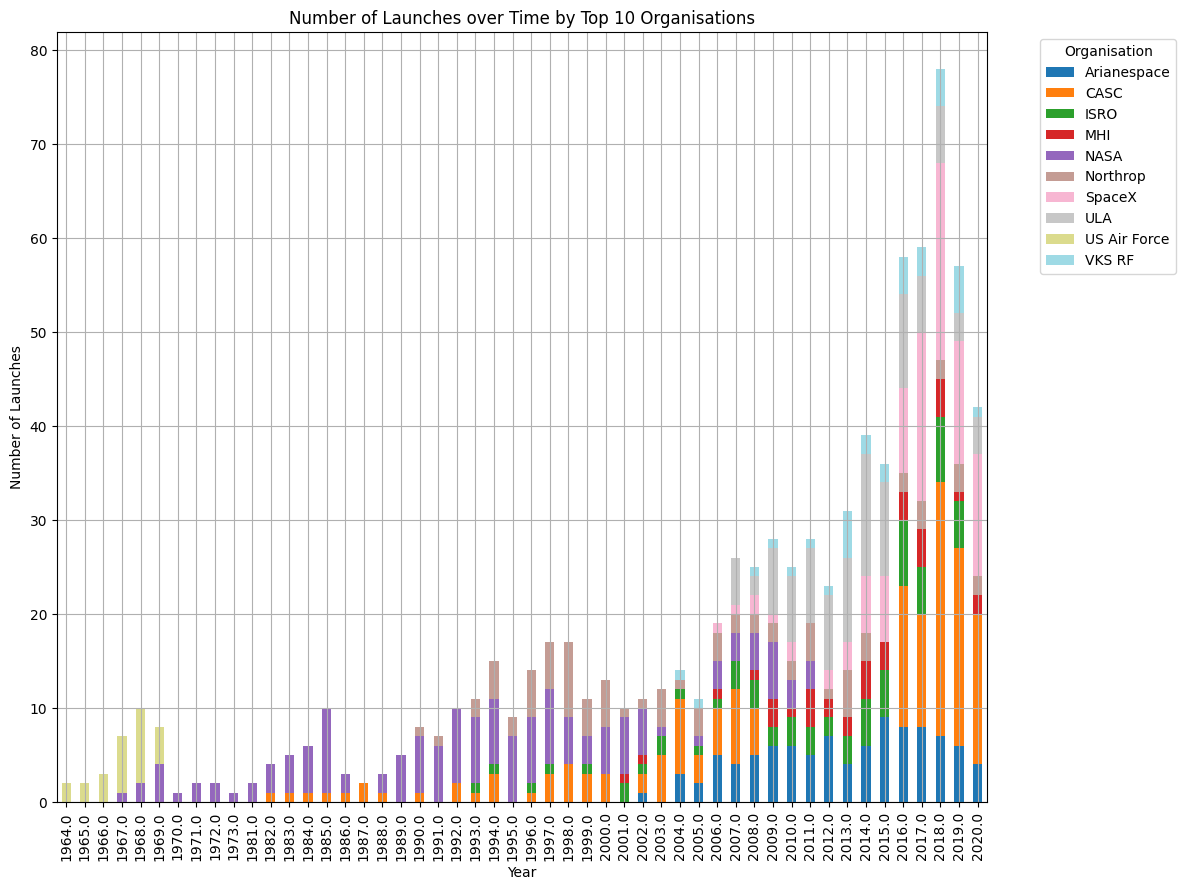

In [74]:
launches.plot(kind = "bar", stacked = True, figsize = (12, 10), colormap = "tab20")
plt.title("Number of Launches over Time by Top 10 Organisations")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.legend(title="Organisation", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.grid(True)

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [75]:
df_data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status', 'Country_codes', 'ISO', 'Year', 'Month'],
      dtype='object')

In [76]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_codes,ISO,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,"2,020.00",August
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,"2,020.00",August
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,"2,020.00",July
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,"2,020.00",July
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN,"2,020.00",July


In [77]:
cold_war_update = {
    'Russian Federation': 'USSR',
    'Kazakhstan': 'USSR'
}
df_data.loc[(df_data['Date'].dt.year <= 1991), 'Country_codes'] = df_data['Country_codes'].replace(cold_war_update)

In [78]:
cold_war = df_data[df_data['Country_codes'].isin(["USA", "USSR"]) &(df_data["Date"].dt.year <= 1991)]

cold_war_launches = cold_war.groupby(['Year', 'Country_codes']).size().unstack(fill_value = 0)
print(cold_war_launches)

Country_codes  USA  USSR
Year                    
1,964.00         2     0
1,965.00         2     0
1,966.00         3     0
1,967.00         7     0
1,968.00        10     0
1,969.00         8     0
1,970.00         1     0
1,971.00         2     0
1,972.00         2     0
1,973.00         1     0
1,981.00         2     0
1,982.00         3     0
1,983.00         4     0
1,984.00         5     0
1,985.00         9     0
1,986.00         2     0
1,987.00         0     1
1,988.00         3     1
1,989.00         6     0
1,990.00        10     0
1,991.00         7     0


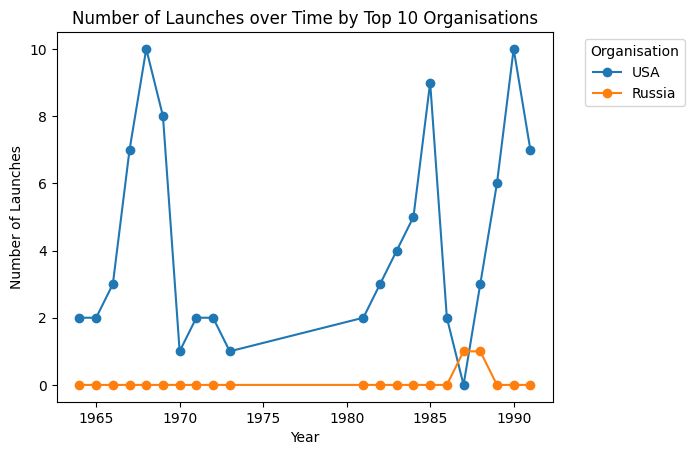

In [79]:
plt.plot(cold_war_launches.index, cold_war_launches["USA"], label="USA", marker = "o")
plt.plot(cold_war_launches.index, cold_war_launches["USSR"], label="Russia", marker = "o")
plt.title("Number of Launches over Time by Top 10 Organisations")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.legend(title="Organisation", bbox_to_anchor = (1.05, 1), loc = "upper left")

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [80]:
ussr_countries = ['Russia', 'Kazakhstan', 'Ukraine', 'Belarus', 'Uzbekistan', 'Turkmenistan',
                  'Azerbaijan', 'Armenia', 'Georgia', 'Latvia', 'Lithuania', 'Estonia', 'Moldova',
                  'Kyrgyzstan', 'Tajikistan']

# Map the countries to 'USSR' or 'USA'
df_data['Superpower'] = df_data['Country_codes'].apply(lambda x: 'USSR' if x in ussr_countries else ('USA' if x == 'USA' else 'Other'))

# Filter the dataset to include only launches from 'USA' and 'USSR' up until 1991
cold_war_data = df_data[(df_data['Superpower'].isin(['USA', 'USSR'])) & (df_data['Year'] <= 1991)]

# Calculate the total number of launches for each superpower
launch_counts = cold_war_data['Superpower'].value_counts().reset_index()
launch_counts.columns = ['Superpower', 'Launches']

# Create the pie chart
fig = px.pie(launch_counts, names='Superpower', values='Launches',
             title='Total Number of Launches: USA vs USSR (up to 1991)',
             color_discrete_map={'USA': 'blue', 'USSR': 'red'})

# Show the plot
fig.show()

In [89]:
df_data["Superpower"].unique()

array(['USA', 'Other', 'USSR'], dtype=object)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

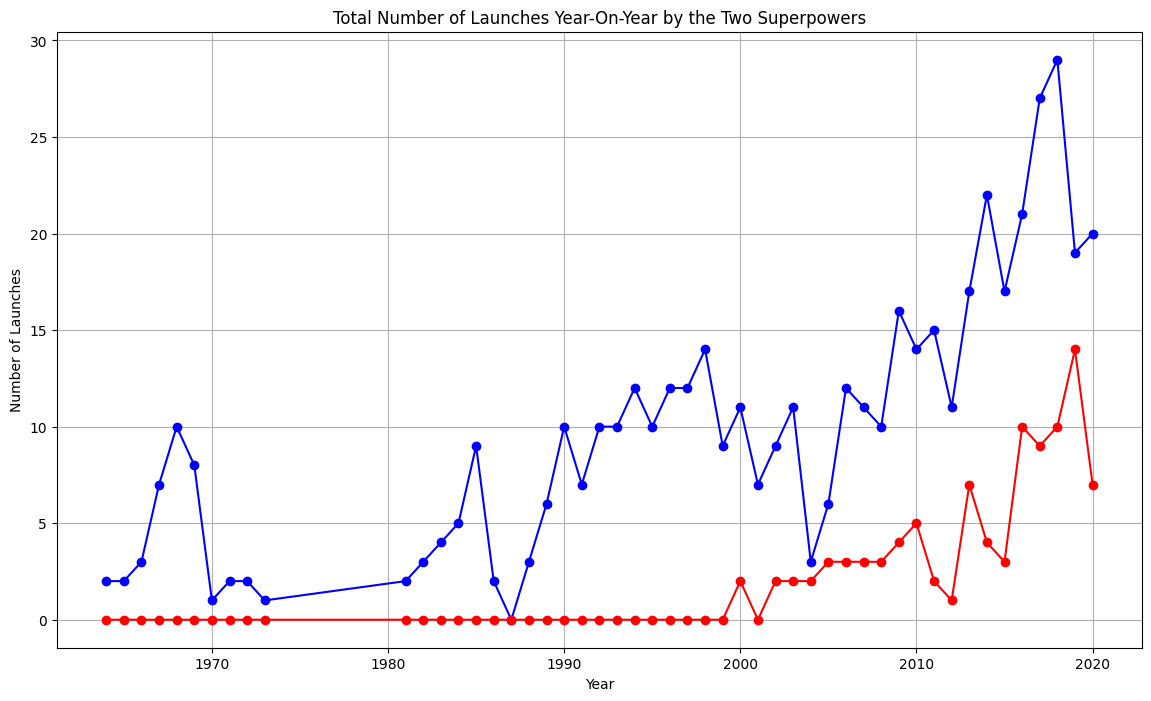

In [90]:
launch_counts_super = df_data.groupby(['Year', 'Superpower']).size().unstack(fill_value = 0)
plt.figure(figsize=(14, 8))
plt.plot(launch_counts_super.index, launch_counts_super["USA"], label="USA", marker = "o", color = "blue")
plt.plot(launch_counts_super.index, launch_counts_super["USSR"], label="USSR", marker = "o", color = "red")

plt.title("Total Number of Launches Year-On-Year by the Two Superpowers")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.grid(True)
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

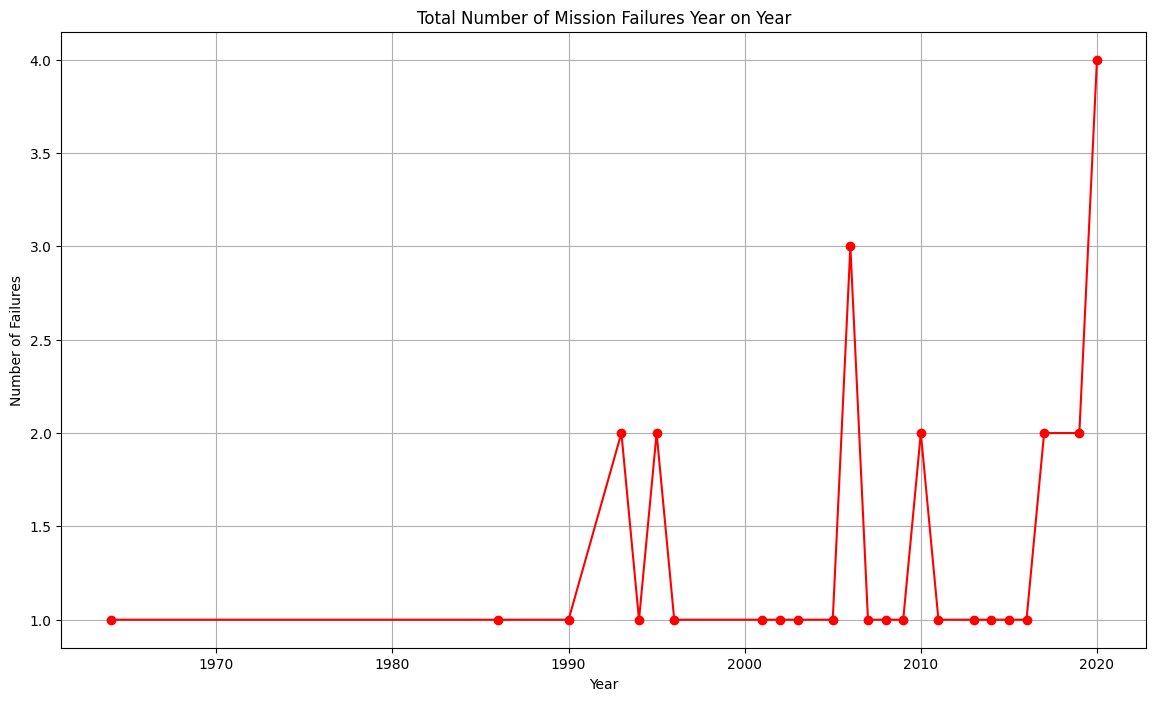

In [93]:
failure_data = df_data[df_data["Mission_Status"] == "Failure"]
failure_year = failure_data.groupby("Year").size().reset_index(name="Failures")

plt.figure(figsize=(14, 8))
plt.plot(failure_year["Year"], failure_year["Failures"], marker="o", color="red")
plt.title("Total Number of Mission Failures Year on Year")
plt.xlabel("Year")
plt.ylabel("Number of Failures")
plt.grid(True)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

/tmp/ipython-input-3157459475.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





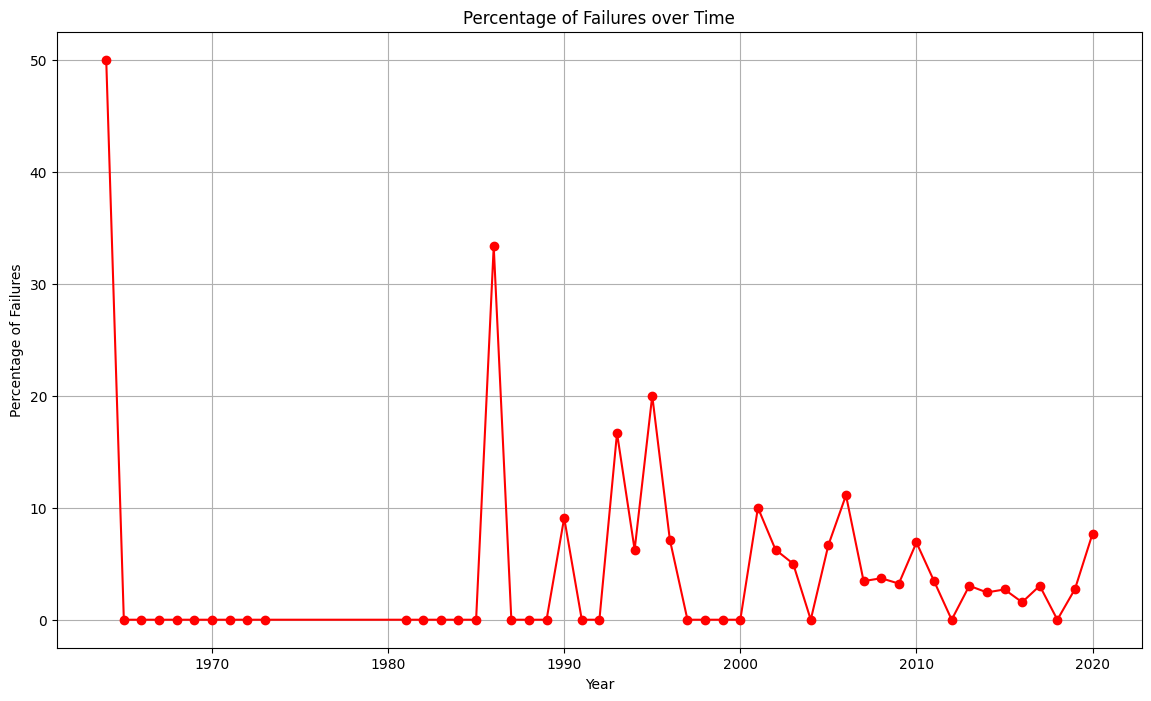

In [94]:
launches_by_year = df_data.groupby("Year").size().reset_index(name="Launches")

failure_percentage = pd.merge(launches_by_year, failure_year, on="Year", how="left")
failure_percentage["Failures"].fillna(0, inplace=True)

failure_percentage["Failure_percentage"]= (failure_percentage["Failures"]/failure_percentage["Launches"])*100

plt.figure(figsize=(14, 8))
plt.plot(failure_percentage["Year"], failure_percentage["Failure_percentage"], marker="o", color="red")
plt.title("Percentage of Failures over Time")
plt.xlabel("Year")
plt.ylabel("Percentage of Failures")
plt.grid(True)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [100]:
data_up_to_2022 = df_data[df_data["Year"] <= 2022]
total = data_up_to_2022.groupby(["Year", "Country_codes"]).size().unstack(fill_value = 0)

country_lead = total.idxmax(axis = 1)

print("Country lead in the terms of lauchnes: ", country_lead)

succes = data_up_to_2022[data_up_to_2022["Mission_Status"] == "Success"]

succes_by_year = succes.groupby(["Year", "Country_codes"]).size().unstack(fill_value = 0)
print(succes_by_year)

country_lead_succes = succes_by_year.idxmax(axis = 1)
print("Country lead in the terms of succes: ", country_lead_succes)

Country lead in the terms of lauchnes:  Year
1,964.00      USA
1,965.00      USA
1,966.00      USA
1,967.00      USA
1,968.00      USA
1,969.00      USA
1,970.00      USA
1,971.00      USA
1,972.00      USA
1,973.00      USA
1,981.00      USA
1,982.00      USA
1,983.00      USA
1,984.00      USA
1,985.00      USA
1,986.00      USA
1,987.00    China
1,988.00      USA
1,989.00      USA
1,990.00      USA
1,991.00      USA
1,992.00      USA
1,993.00      USA
1,994.00      USA
1,995.00      USA
1,996.00      USA
1,997.00      USA
1,998.00      USA
1,999.00      USA
2,000.00      USA
2,001.00      USA
2,002.00      USA
2,003.00      USA
2,004.00    China
2,005.00      USA
2,006.00      USA
2,007.00      USA
2,008.00      USA
2,009.00      USA
2,010.00      USA
2,011.00      USA
2,012.00      USA
2,013.00      USA
2,014.00      USA
2,015.00      USA
2,016.00      USA
2,017.00      USA
2,018.00      USA
2,019.00    China
2,020.00      USA
dtype: object
Country_codes  China  France  Gran Canari

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

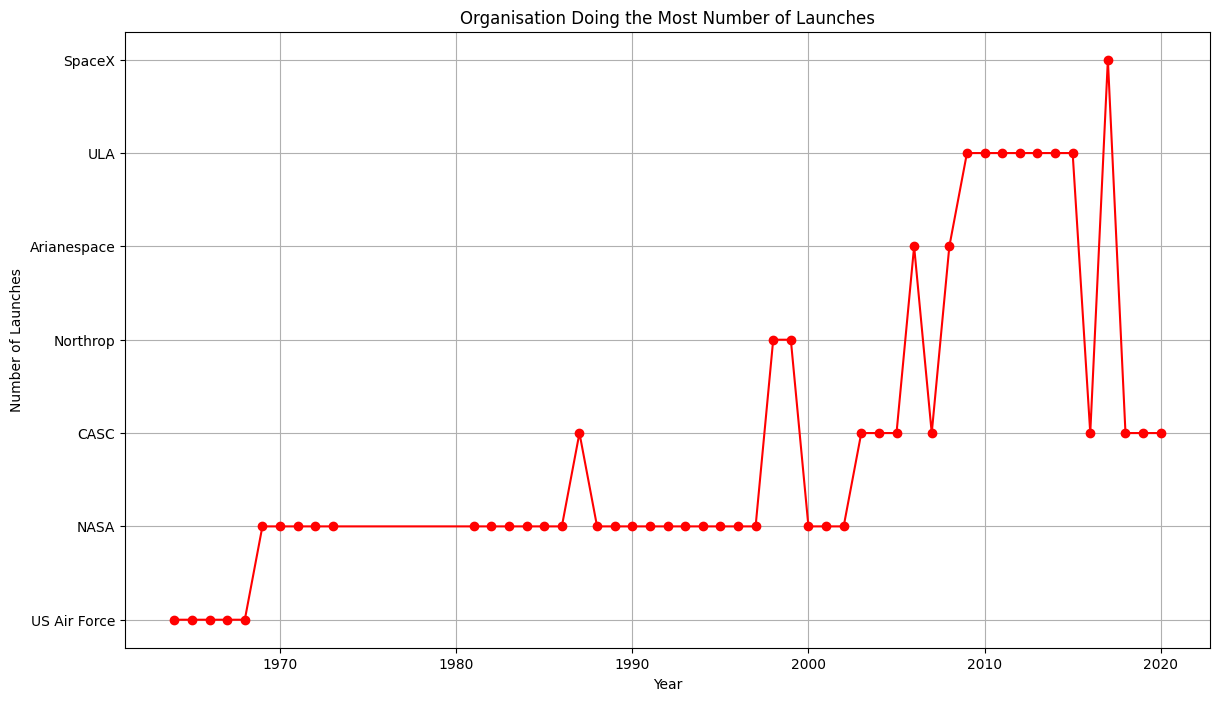

In [101]:
launches_most = data_up_to_2022.groupby(["Year", "Organisation"]).size().unstack(fill_value = 0)

led_year = launches_most.idxmax(axis= 1)
plt.figure(figsize=(14, 8))
plt.plot(led_year.index, led_year.values, marker="o", color = "red")
plt.title("Organisation Doing the Most Number of Launches")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.grid(True)
plt.show()